# Installation

In [ ]:
# run this cell to install pycaret in Google Colab
# !pip install pycaret

In [ ]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [1]:
from pycaret.utils import version
version()

1.0.0


# 1. Importing Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


# 2. Iteration 1: (without preprocessing)

In [3]:
from pycaret.regression import *
reg1 = setup(data, target = 'Price', session_id=786)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 2.1. Compare Models

In [4]:
compare_models(blacklist = ['tr', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,758.154,2.34135e+06,1504.97,0.9771,0.0815,0.0607
1,Light Gradient Boosting Machine,761.549,2.89163e+06,1663.59,0.9717,0.0786,0.0575
2,Random Forest,774.567,2.8933e+06,1656.46,0.9715,0.0817,0.06
3,Gradient Boosting Regressor,917.863,3.27944e+06,1781.35,0.9686,0.1005,0.0766
4,Extreme Gradient Boosting,937.934,3.31544e+06,1794.93,0.9685,0.1041,0.0791
5,Decision Tree,1006.44,4.68776e+06,2119.35,0.9542,0.1087,0.0781
6,Ridge Regression,2506.94,1.50491e+07,3851.67,0.8571,0.6734,0.2947
7,Lasso Regression,2506.12,1.51239e+07,3862.55,0.8559,0.6749,0.2941
8,Lasso Least Angle Regression,2448.99,1.51673e+07,3865.12,0.8559,0.6613,0.2801
9,Bayesian Ridge,2509.28,1.51337e+07,3863.81,0.8559,0.6743,0.2947


## 2.2 Create Model

In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2363.3381,1.123549e+07,3351.9387,0.8739,0.6076,0.3036
1,2411.4881,1.411622e+07,3757.1552,0.8561,0.6370,0.3063
2,2533.7810,1.506909e+07,3881.8924,0.8056,0.7226,0.3172
3,2614.8429,1.532942e+07,3915.2802,0.8512,0.7230,0.2986
4,2790.3524,2.231435e+07,4723.8066,0.8435,0.7523,0.3060
5,2541.1524,1.795197e+07,4236.9771,0.8588,0.6868,0.2750
6,2754.2667,1.922224e+07,4384.3176,0.8507,0.8454,0.3088
7,2300.2905,1.034745e+07,3216.7459,0.8810,0.5644,0.2801
8,2453.0810,1.502701e+07,3876.4688,0.8583,0.5913,0.2940
9,2428.9021,1.152096e+07,3394.2538,0.8685,0.6308,0.2749


# 2.3 Plot Model

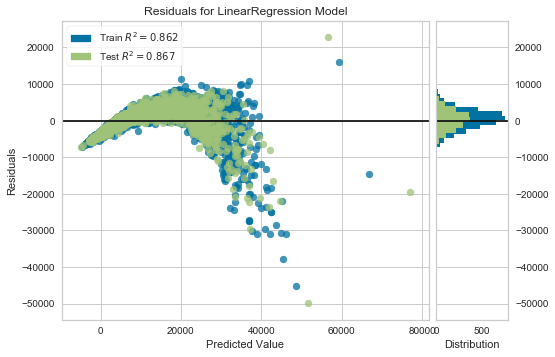

In [6]:
plot_model(lr)

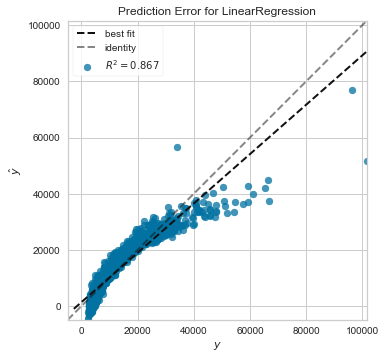

In [7]:
plot_model(lr, plot = 'error')

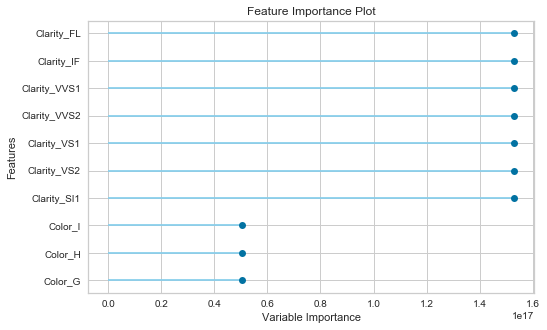

In [8]:
plot_model(lr, plot = 'feature')

# 3. Iteration 2: (with preprocessing)

In [9]:
# profile = True
data = get_data('diamond', profile = True)

In [10]:
reg2 = setup(data, target = 'Price', session_id=786,
             transform_target = True,
             bin_numeric_features=['Carat Weight'],
             remove_multicollinearity=True,
             feature_interaction=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 3.1 Create Model

In [11]:
lr2 = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,907.8528,2.710289e+06,1646.2954,0.9696,0.1149,0.0857
1,1058.5445,5.217063e+06,2284.0890,0.9468,0.1117,0.0861
2,1027.9557,3.809926e+06,1951.9033,0.9509,0.1204,0.0915
3,1081.5448,4.150418e+06,2037.2576,0.9597,0.1134,0.0864
4,1011.0021,4.244906e+06,2060.3169,0.9702,0.1146,0.0873
5,1214.4949,6.033269e+06,2456.2713,0.9525,0.1263,0.0946
6,940.0635,5.191595e+06,2278.5071,0.9597,0.1064,0.0772
7,1070.1651,3.400733e+06,1844.1075,0.9609,0.1331,0.1017
8,1055.0889,5.147534e+06,2268.8178,0.9515,0.1161,0.0869
9,1000.1140,2.839241e+06,1685.0048,0.9676,0.1156,0.0870


## 3.2. Plot Model

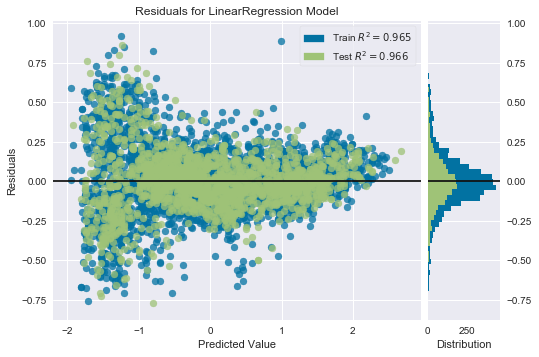

In [34]:
plot_model(lr2)

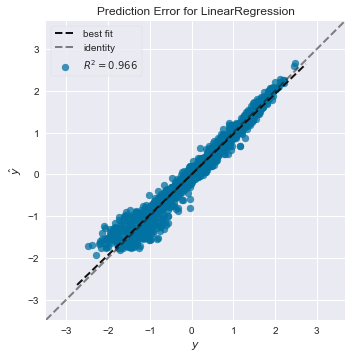

In [21]:
plot_model(lr2, plot = 'error')

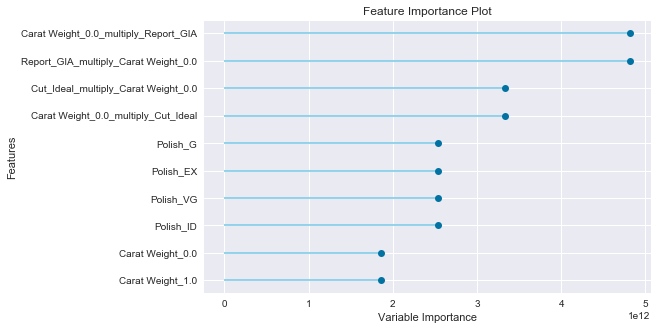

In [22]:
plot_model(lr2, plot = 'feature')

# 4. Finalize Model

In [23]:
holdout_pred = predict_model(lr2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,963.3395,3.971679e+06,1992.9072,0.9606,0.1102,0.084


In [24]:
final_lr = finalize_model(lr2)

In [25]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


# 5. Save Model

In [26]:
save_model(final_lr, 'lr_smith_demo')

Transformation Pipeline and Model Succesfully Saved


In [27]:
lr_loaded = load_model('lr_smith_demo')

Transformation Pipeline and Model Sucessfully Loaded


In [28]:
print(lr_loaded)

[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_i...
                ('feature_select', Empty()),
                ('fix_multi',
                 Fix_multicollinearity(correlation_with_target_preference=None,
                                       correlation_with_target_threshold=0.0,
                                       target_variable='Price',
                          

In [29]:
predictions = predict_model(lr_loaded, data=data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5641.2017
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3402.7208
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3469.7911
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,3825.9821
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3577.2618


# 6. Deploy Model

In [31]:
deploy_model(final_lr, model_name = 'lr_smith_demo', platform = 'aws',
             authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


In [33]:
predictions2 = predict_model('lr_smith_demo', data=data)
predictions2.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5641.2017
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3402.7208
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3469.7911
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,3825.9821
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3577.2618


# Learning Resources:

- PyCaret Regression Module : https://www.pycaret.org/regression
- Regression Tutorial (Level Beginner) : https://pycaret.org/reg101/
- Regression Tutorial (Level Intermediate) : https://pycaret.org/reg102/